# Experimental Variogram Analysis

We require a covariance function or a variogram to perform interpolation with kriging methods that we discussed during the lecture. A valid question that came up several times during lecture  was just how do we determine this covariance (or the variogram) function? We will have a look at a method to perform this step in the following notebook.

Two weeks ago we detrended the DT (delta T) data of a well log. In this notebook we will now use this data again to determine an experimental variogram of the data set. For those of you who did not finisch that exercise, we also provided the detrended dataset (just depth and detrended DT) on Moodle.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Opening the detrended data set from data preparation exercise

The first step is, of course, to open the detrended data set so that we can use it here to determine the experimental variogram. This peice of code should work if you use the `data_detr.csv` provided on Moodle.

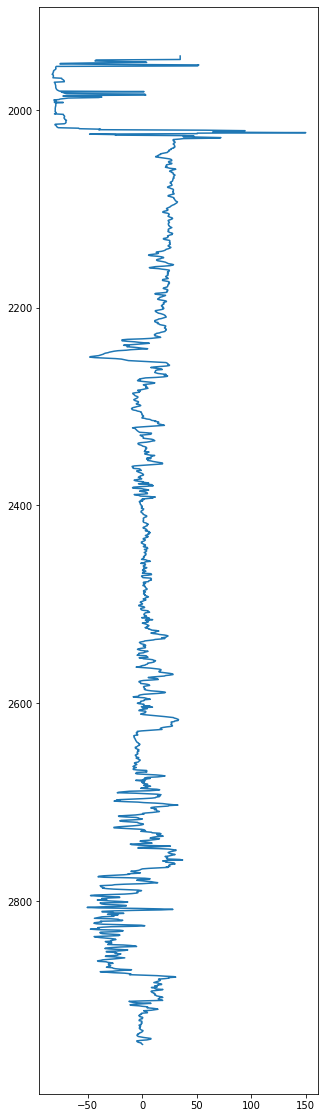

In [3]:
data = pd.read_csv('data_detr.csv')

# Plotting
plt.figure(figsize=(5,20))
plt.plot(data['DT'], data['DEPT'])
plt.gca().invert_yaxis()

In [11]:
data.head()

,DEPT,DT
0,1945.5,34.979732
1,1946.0,34.984350
2,1946.5,34.988967
3,1947.0,34.993585
4,1947.5,34.998202


## Creating an Experimental Variogram

Recall the calculation of the experimental variogram:

$$\hat{\gamma}(\vec{h}) = \frac{1}{2} \frac{1}{n} \sum_{\alpha=1}^n \left(z(\vec{x_\alpha}+\vec{h}) - z(\vec{x_\alpha})\right)^2 $$

Before we can calculate the experimental variogram values, we need to determine reasonable steps of $\vec{h}$ and tolerance values $\Delta \vec{h}$.

We will now use this data to create the experimental (semi-)variogram. In order to calculate a semivariance value for a specified distance $h$ and a tolerance level $tol$, we need to take the data points in the set, determine all values which are in a distance of $h +/- tol$, and add them to a list. We repeat this for all points in the data set, and finally calculate the (semi-)variance for the obtained list.

We will decompose this procedure into several steps.

### Step 1: 

We want to revisit how we can mask certain parts of a `numpy.array`. 

<div class='alert alert-info'>
    
**Your task**: Write a function to extract DT values (and corresponding distances h) from the data set which are at a distance $h = 10$ from the depth position $d = 2500$ with a tolerance of $tol = 5$. 

**Before you start coding**: Discuss with your group and draw a sketch: Which values  are you actually trying to extract - and what is described by the given parameters?

**Hint**: As stated before you will need masking operations. Take a look at `np.where`.

How can you check your result?
</div>

In [ ]:
np.where

In [9]:
d = 2500
lag = 10
tol = 5

def single_data_extraction(data, depth, lag, tol):
    """Calculate semivariance for single lag distance with defined tolerance
    
    **Arguments**:
        - data = np.array : input array with depth and DT values
        - depth = int : z-positions from which to calcualte distances
        - lags = int : lag distance
        - tol = int : tolerance level
        
    **Returns**:
        - dt_vals = np.array : dt values within given lag and tolerance
        - h = np.array : corresponding lag distances
    """
    # YOUR CODE HERE
#     lag_range = [ values for values in data['DEPT'].values if (2500-lag) <= values >= (2500+lag) ]
#     tol_range = [ values for values in lag_range if ]

    n = len(data[:,0])
    pos = data[:,0]
    vals = data[:,1]
    
    h = np.abs(d-pos)
    
    mask = np.where((h > (lag-tol)) & (h < (lag+tol)))
    dt_vals = h[mask]
    dist = pos[mask]
    
    return dt_vals, dist

# This calculates it here for the parameters defined above:
# Hint: data.values extracts the data from the pd dataframe as a 2d numpy array
dt_vals, dist = single_data_extraction(data.values, d, lag, tol)


In [35]:
print(np.where(2485 <= pos >= 2495) & (2505 <= pos >= 2515))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Step 2: 

Now we want to create the full distance matrix (and corresponding amtrix of semivariances). How big will this matrix be? Why? 

<div class='alert alert-info'>
    
**Your task**: Extend the function above to extract these values for all data points in the data set (iterate through all rows in the subrange) and also calculate the respective semivariance (dissimilarity) instead of just the dt for each lag distance in a separate matrix.

**Hint**: In this step you do not need the amsking operations.
</div>

In [ ]:
def all_semivariances(data):
    """Calculate semivariance for single lag distance with defined tolerance
    
    **Arguments**:
        - data = np.array : input array with depth, permeabilty, porosity
        
    **Returns**:
        - gamma = np.array : semivariance for certain lag - the dissimilarity between two points at certain distance
        - h = np.array : corresponding lag distances
    """
    # YOUR CODE HERE
    
    return gamma, h
    

# The following code should work if you implemented the function correctly
# Calculate it for the complete dataset:
gamma, h = all_semivariances(data.values)

# This shows how many point pairs we have
# Does it make sense? Why?
gamma.flatten().shape


We would like to plot the results, but actually this causes a little problem: The arrays for gamma and h each have nearly 4 million entries (and rememeber we already reduced the dataset), which is a little too much for `matplotlib` to handle sometimes. A workaround is to plot only a certain amount of entries. In order to not get a biased result due to the arrays being sorted, we can just plot every 10th entry. **Hint**: Look at the `numpy` slicing options again.

<div class='alert alert-info'>
    
**Your task**: Plot a reduced number (every 10th) of the calculated semivariances against their respective lag distance h. What does the result look like? Did you expect that and what is the reason for this behavior? **Hint**: MAke use of the `flatten()`method again.
</div>

In [ ]:
# YOUR CODE HERE

### Step 3: 

Finally we need to combine Step 1 and 2 to get a result that is easier to interpret. Start again by sketching out exactly what you want to do based on the plot above.

<div class='alert alert-info'>
    
**Your task**: Perform this analysis now for multiple ranges of lag values, taking the average value of semivariance for each bin (lag distance +/- tolerance), from $h = 0$ to $h = 500$ with a step size of $\Delta h = 10$ (twice the tolerance).

Discuss why 500 is a reasonable value for the maximumlag lag distance $h$.
</div>

In [ ]:
start = 0
stop = 500
lag_step = 10 #basically twice the tolerance of 5

# Create one-d arrays if your previous results are in matrix form:
h = h.flatten()
gamma = gamma.flatten()

In [ ]:
# YOUR CODE HERE

Create a plot of the calculated variogram values:

In [ ]:
# YOUR CODE HERE